In [1]:
import numpy
from etrade.spot.forecast.plan_a.simulator import MarketSimulator
from etrade.spot.trader import Station
from etrade.spot.market.recycle import BasicRecycle, PointwiseRecycle
from etrade.spot.forecast.market import DistributiveSeries, DistributiveMarket
from etrade.spot.forecast.plan_a.constructor import *
from etrade.spot.forecast.yieldindex import zero_quantile
from etrade.spot.forecast import yieldindex
from  data_utils.stochastic_utils.vdistributions.abstract import AbstractDistribution, eps
from  data_utils.stochastic_utils.vdistributions.parameter.continuous.basic import NormalDistribution, SkewNormalDistribution
from data_utils.stochastic_utils.vdistributions.nonparametric.continuous.kernel2 import KernelMixDistribution
from data_utils.stochastic_utils.vdistributions.tools.divergence import kl_divergence_continuous, crps, quantile_RMSE, js_divergence_continuous

from data_utils.stochastic_utils.vdistributions.nonparametric.continuous.mfk.skewnd2 import dof_snd_fitter

from scipy.optimize import differential_evolution

from matplotlib import pyplot
import json

In [2]:
init_kwargs = {
    "aq_constructor": OrdinaryGaussianKernelDistributionConstructor((0, 50), (1, 10), (1, 8)),
    "dp_constructor": OrdinaryGaussianKernelDistributionConstructor((0, 10), (1, 10), (1, 8)),
    "rp_constructor": OrdinaryGaussianKernelDistributionConstructor((0, 10), (1, 10), (1, 8)),
    "aq_range": (0, 50),
    "dp_range": (0, 1e+6),
    "rp_range": (0, 1e+6),
    "real_market": 1000,
    "noise_weight": 0,
    "market_len": 1,
    "kernel_num": None
}
s = Station("station", 50)
br = PointwiseRecycle(0.5, 1.05)

In [3]:
ms = MarketSimulator(**init_kwargs)

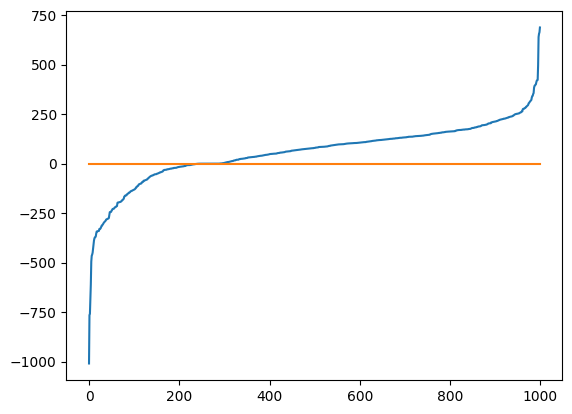

In [4]:
a, b = ms.optimized_trade(s, br)
pyplot.plot(numpy.sort(a-b))
pyplot.plot([0] * len(a))

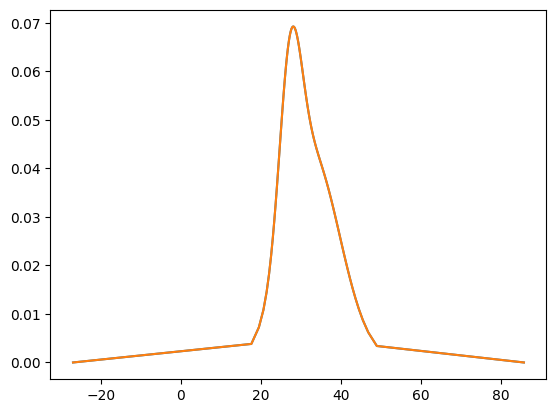

In [5]:
ppf, pdf, cdf = ms.real_market.power_generation.distributions[0].curves()
ppf1, pdf1, cdf1 = ms.predicted_market.power_generation.distributions[0].curves()
pyplot.plot(pdf[:,0], pdf[:,1])
pyplot.plot(pdf1[:,0], pdf1[:,1])

In [6]:
ms.predicted_market.ppf_difference()

array([[ 17.61483763,  22.62770198,  24.32346594,  25.44599912,
         26.3492611 ,  27.15033759,  27.90615589,  28.65266503,
         29.41794597,  30.22761582,  31.10522284,  32.06951238,
         33.12819287,  34.27881119,  35.5223408 ,  36.88238009,
         38.4238956 ,  40.29534134,  42.90876126,  49.07406652,
        -12.1216013 ,  -3.17125826,  -0.29190849,   1.57091382,
          3.01150228,   4.16252468,   5.0770621 ,   5.82090138,
          6.45399773,   7.01942673,   7.54738032,   8.05977031,
          8.57586064,   9.11570705,   9.7057032 ,  10.38456143,
         11.22533149,  12.38965319,  14.40601155,  21.62950647,
        -10.12291001,  -5.15321124,  -3.01835018,  -1.85339704,
         -1.15139331,  -0.64171201,  -0.22564443,   0.13952872,
          0.47660193,   0.79999002,   1.12092888,   1.45003999,
          1.79982373,   2.18779791,   2.64397814,   3.22822796,
          4.08296657,   5.50141041,   7.73819083,  12.70980539]])

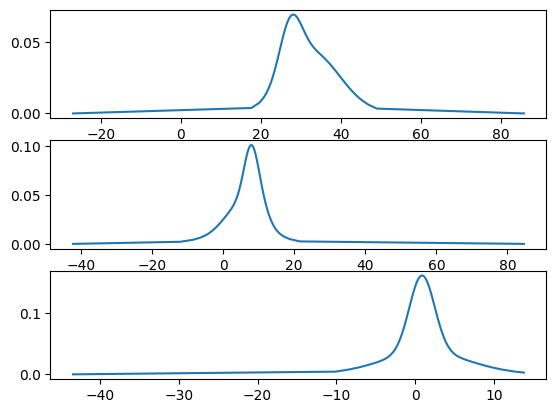

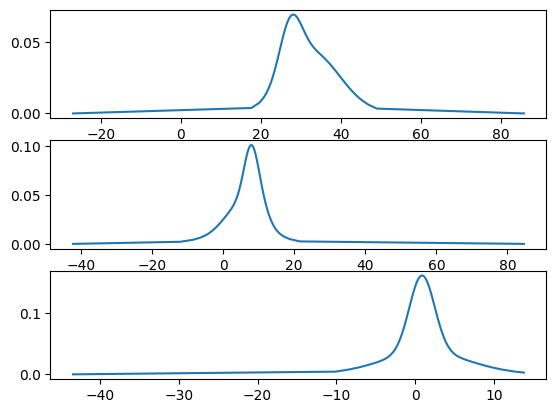

In [7]:
ms.real_market.plot()
ms.predicted_market.plot()

In [8]:
ms.predicted_market.pdf_difference()

[0.7024816030580388]